In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/outliersremoveddata/File5.csv


In [2]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

2024-05-25 03:30:48.118283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 03:30:48.118474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 03:30:48.285520: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
st = StandardScaler()
le = LabelEncoder()
minmax = MinMaxScaler(feature_range = (-1,1))

In [5]:
df = pd.read_csv('/kaggle/input/outliersremoveddata/File5.csv')

In [6]:
hour2022 = df[df['Year'] == 2022]
hour2022.set_index('Date_Time', inplace=True)
hour2022.index = pd.to_datetime(hour2022.index)
hour2022['Date'], hour2022['Time'] = hour2022.index.date, hour2022.index.time

In [7]:
hour2022

,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,Date,Time
Date_Time,,,,,,,,,,,,
2022-01-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,1,5,0.0,2022-01-01,00:00:00
2022-01-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,2,5,0.0,2022-01-01,01:00:00
2022-01-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,3,5,0.0,2022-01-01,02:00:00
2022-01-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,4,5,0.0,2022-01-01,03:00:00
2022-01-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2022,1,0,0,5,5,0.0,2022-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,12,0,0,20,5,0.0,2022-12-31,19:00:00
2022-12-31 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,12,0,0,21,5,0.0,2022-12-31,20:00:00
2022-12-31 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2022,12,0,0,22,5,0.0,2022-12-31,21:00:00


## Preprocessing

In [8]:
## Encoding station pairs using labelencoder

hour2022['station_pair_encoded'] = le.fit_transform(hour2022['Station_Pair'])
hour2022.drop(['Station_Pair'], axis=1, inplace=True)

In [9]:
# hour2022.drop(['Year'], axis=1, inplace=True)
hour2022.drop(['Date', 'Time'], axis=1, inplace=True)

In [10]:
hour2022.columns

Index(['Sid', 'Did', 'Year', 'Month', 'Is_Holiday', 'Holiday_Type',
       'OneHourSlot', 'Weekday', 'Passenger_Count', 'station_pair_encoded'],
      dtype='object')

In [11]:
encode_features = ['Sid', 'Did', 'Is_Holiday', 'Holiday_Type', 'Weekday', 'OneHourSlot']

for feature in encode_features:
    hour2022[feature] = le.fit_transform(hour2022[feature])

for feature in encode_features:
    hour2022[feature] = minmax.fit_transform(hour2022[feature].values.reshape(-1,1))

In [12]:
leftover_features = ['station_pair_encoded', 'Passenger_Count']

for feature in leftover_features:
    hour2022[feature] = minmax.fit_transform(hour2022[feature].values.reshape(-1,1))

In [13]:
hour2022

,Sid,Did,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,station_pair_encoded
Date_Time,,,,,,,,,,
2022-01-01 00:00:00,0.454545,0.090909,2022,1,-1.0,-1.0,-1.000000,0.666667,-1.0,-1.0
2022-01-01 01:00:00,0.454545,0.090909,2022,1,-1.0,-1.0,-0.913043,0.666667,-1.0,-1.0
2022-01-01 02:00:00,0.454545,0.090909,2022,1,-1.0,-1.0,-0.826087,0.666667,-1.0,-1.0
2022-01-01 03:00:00,0.454545,0.090909,2022,1,-1.0,-1.0,-0.739130,0.666667,-1.0,-1.0
2022-01-01 04:00:00,0.454545,0.090909,2022,1,-1.0,-1.0,-0.652174,0.666667,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.636364,0.090909,2022,12,-1.0,-1.0,0.652174,0.666667,-1.0,1.0
2022-12-31 20:00:00,0.636364,0.090909,2022,12,-1.0,-1.0,0.739130,0.666667,-1.0,1.0
2022-12-31 21:00:00,0.636364,0.090909,2022,12,-1.0,-1.0,0.826087,0.666667,-1.0,1.0


In [14]:
## Resampling and Interpolation

hour2022_values = hour2022[['Passenger_Count']]
hour2022_values.interpolate(method='polynomial', order=2, inplace=True, axis=0)

In [15]:
hour2022_values = hour2022_values.resample('H').max().ffill()

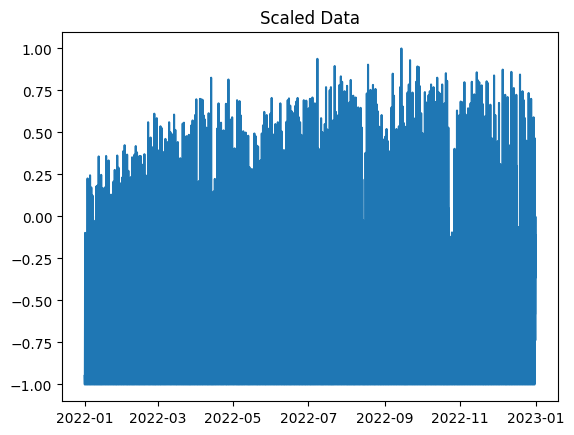

In [16]:
plt.plot(hour2022_values)
plt.title('Scaled Data')
plt.show()

In [18]:
import statsmodels.tsa.seasonal as sm

sd = sm.seasonal_decompose(
    hour2022_values,
    model = 'additive',
    period = 10
)

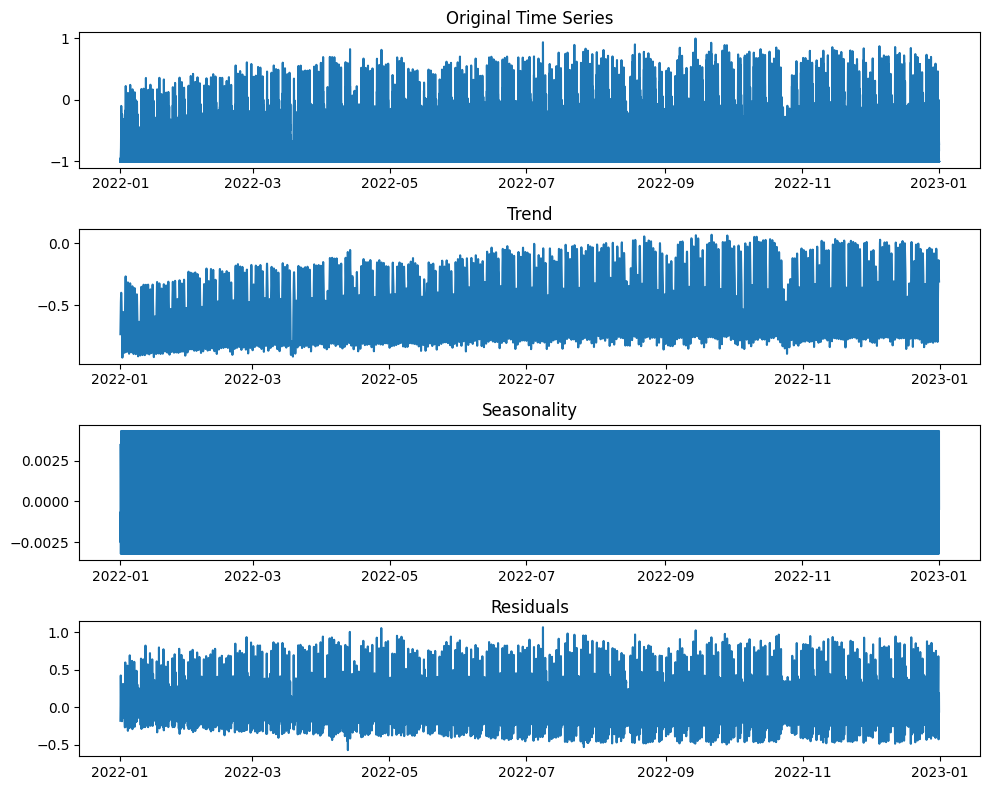

In [19]:
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(hour2022['Passenger_Count'])
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(sd.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(sd.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(sd.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [20]:
hour2022_values = hour2022_values.values

## Models

In [21]:
timestep = 10
train_split = int(len(hour2022_values)*0.8)
train, test = hour2022_values[:train_split], hour2022_values[train_split:]

X_train, y_train = [],[]
X_test, y_test = [],[]

for i in range(len(train)-timestep):
    X_train.append(train[i:i+timestep])
    y_train.append(train[i+timestep])

for i in range(len(test)-timestep):
    X_test.append(test[i:i+timestep])
    y_test.append(test[i+timestep])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [96]:
print(X_train.shape, y_train.shape)

(282, 10, 1) (282, 1)


In [110]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, activation = 'relu', input_shape=(10,1), return_sequences=True),
    tf.keras.layers.LSTM(50, activation = 'relu', return_sequences=False),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'mse',
    metrics = ['mse']
)

In [111]:
LSTM_history = model.fit(X_train, y_train, batch_size=16, epochs=30)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2379 - mse: 0.2379
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1142 - mse: 0.1142
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0930 - mse: 0.0930
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0841 - mse: 0.0841
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0859 - mse: 0.0859
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0787 - mse: 0.0787
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1008 - mse: 0.1008
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0747 - mse: 0.0747
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0785 - mse: 0.0785
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0783 - mse: 0.0783
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0756 - mse: 0.0756
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0594 - mse: 0.0594
Epoch 13/25
18/18 ━━━━━━━━━━━━━━━━━━━

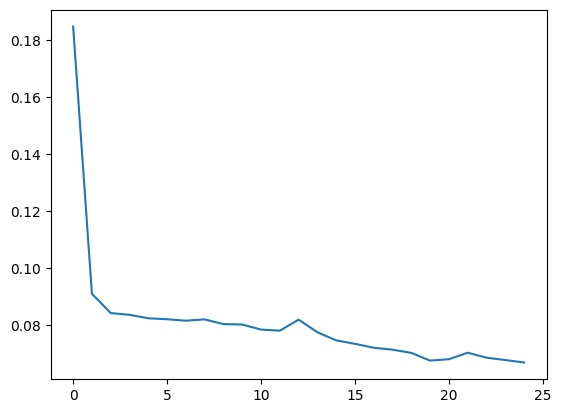

In [112]:
plt.plot(LSTM_history.history['loss'])
plt.show()

In [141]:
class LSTMmodel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(LSTMmodel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True)
        self.fc = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        h0_1 = torch.zeros(1, x.size(0), self.lstm1.hidden_size)
        c0_1 = torch.zeros(1, x.size(0), self.lstm1.hidden_size)
        
        out, (hn1, cn1) = self.lstm1(x,(h0_1, c0_1))
        
        h0_2 = torch.zeros(1, x.size(0), self.lstm2.hidden_size)
        c0_2 = torch.zeros(1, x.size(0), self.lstm2.hidden_size)
        
        out, (hn2, cn2) = self.lstm2(out, (h0_2, c0_2))
        
        out = self.fc(out[:, -1, :])
        return out

In [142]:
model = LSTMmodel(1, 100, 50, 10)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [143]:
X_train_tensor, y_train_tensor = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test_tensor, y_test_tensor = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [144]:
X_train_tensor.shape

torch.Size([6998, 10, 1])

In [145]:
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    optimizer.zero_grad()
    
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/150], Loss: 0.2012
Epoch [20/150], Loss: 0.1716
Epoch [30/150], Loss: 0.1143
Epoch [40/150], Loss: 0.0460
Epoch [50/150], Loss: 0.0264
Epoch [60/150], Loss: 0.0230
Epoch [70/150], Loss: 0.0214
Epoch [80/150], Loss: 0.0195
Epoch [90/150], Loss: 0.0172
Epoch [100/150], Loss: 0.0216
Epoch [110/150], Loss: 0.0168
Epoch [120/150], Loss: 0.0147
Epoch [130/150], Loss: 0.0135
Epoch [140/150], Loss: 0.0125
Epoch [150/150], Loss: 0.0117


In [146]:
model.eval()
with torch.no_grad():
    test = model(X_test_tensor)
    test_loss = criterion(test, y_test_tensor)
    print(f"Test loss: {test_loss.item()}")

Test loss: 0.014423406682908535


## AutoEncoders

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [23]:
class AutoEncoder(Model):
    def __init__(self, latent_dim, shape):
        super(AutoEncoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),)
            layers.Dense(latent_dim, activation='relu')
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
            layers.Reshape(shape)
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [24]:
auto = AutoEncoder(latent_dim = 64, shape = (10,1))
auto.compile(
    optimizer = 'adam',
    loss = losses.MeanSquaredError()
)

In [25]:
auto.fit(
    X_train, y_train,
    epochs = 10,
    shuffle = True,
    validation_data = (X_test, y_test)
)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7364 - val_loss: 0.3678
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3876 - val_loss: 0.3546
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3831 - val_loss: 0.3526
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3865 - val_loss: 0.3520
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3765 - val_loss: 0.3518
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3843 - val_loss: 0.3517
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3798 - val_loss: 0.3516
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3769 - val_loss: 0.3515
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3768 - val_loss: 0.3514
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3835 - val_loss: 0.3514


In [26]:
encoded_stuff = auto.encoder(X_test).numpy()
decoded_stuff = auto.decoder(encoded_stuff).numpy()

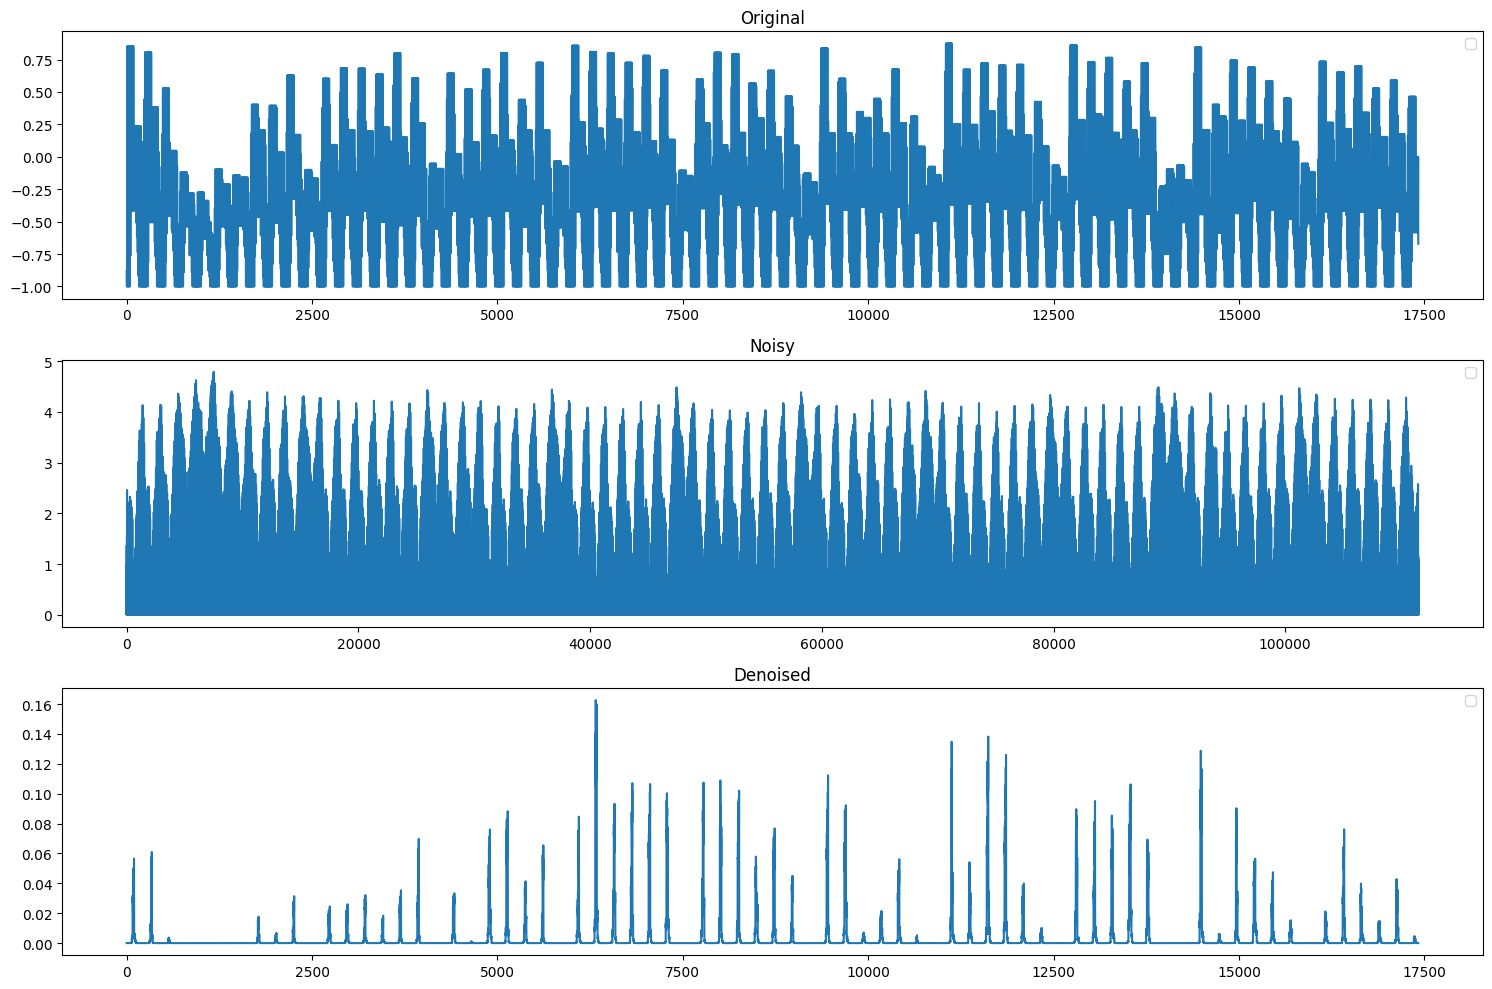

In [29]:
import matplotlib.pyplot as plt

# Define the number of examples to display
n = 5

X_test_new = X_test.reshape(-1,1)
encoded_new = encoded_stuff.reshape(-1,1)
decoded_new = decoded_stuff.reshape(-1,1)

# Create a figure with a specified size
plt.figure(figsize=(15, 10))

# Plot the original data
plt.subplot(3, 1, 1)
plt.plot(X_test_new)
plt.title('Original')
plt.legend()
plt.axis('on')

# Plot the noisy data
plt.subplot(3, 1, 2)
plt.plot(encoded_new)
plt.title('Noisy')
plt.legend()
plt.axis('on')

# Plot the denoised data
plt.subplot(3, 1, 3)
plt.plot(decoded_new)
plt.title('Denoised')
plt.legend()
plt.axis('on')

# Display the plots
plt.tight_layout()
plt.show()

## NBEATS

In [44]:
from darts import concatenate
from darts.models import NBEATSModel
from darts.timeseries import TimeSeries
from darts.metrics import mape, r2_score

In [19]:
data = hour2022[['Passenger_Count']]
data.interpolate(method='polynomial', order=2, inplace=True, axis=0)
data = data.resample('D').sum().ffill()

Text(0.5, 1.0, 'Something plotted here')

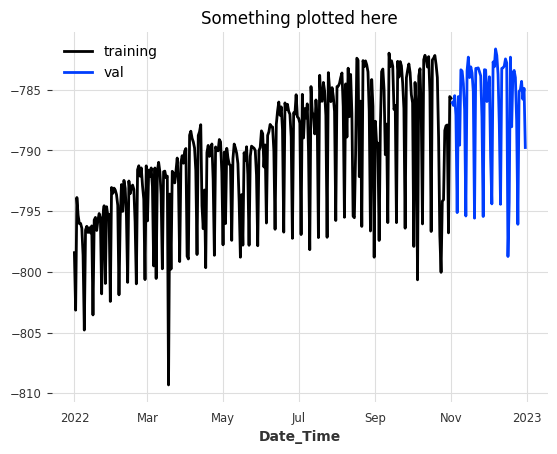

In [24]:
time_series = TimeSeries.from_dataframe(data, fill_missing_dates=True)
train_scaled, val_scaled = time_series.split_after(pd.Timestamp("20221101"))

train_scaled.plot(label="training")
val_scaled.plot(label="val")
plt.title("Something plotted here")

In [57]:
model_name = "nbeats_run"

NModel = NBEATSModel(
    input_chunk_length = 40, 
    output_chunk_length = 14,
    generic_architecture=True,
    num_stacks = 15,
    n_epochs = 50,
    random_state = 42,
    model_name = model_name,
#     activation = 'LeakyReLU'
)

In [ ]:
NModel.fit(train_scaled, val_series=val_scaled)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
pred_series = NModel.historical_forecasts(
    time_series,
    start = val.start_time(),
    forecast_horizon = 7,
    stride = 7,
    last_points_only = False,
    retrain = False,
    verbose = True
)

In [ ]:
pred_series = concatenate(pred_series)

In [ ]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date = None):
    plt.figure(figsize=(8,5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label = ("historic" + forecast_type + "forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

In [ ]:
display_forecast(pred_series, time_series, "7 day", start_date=val.start_time())